### Load data into a dataframe

In [15]:
house_data <- read.csv(file="kc_house_data.csv", header=TRUE, sep=",")

In [16]:
head(house_data)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


## plot area/price 

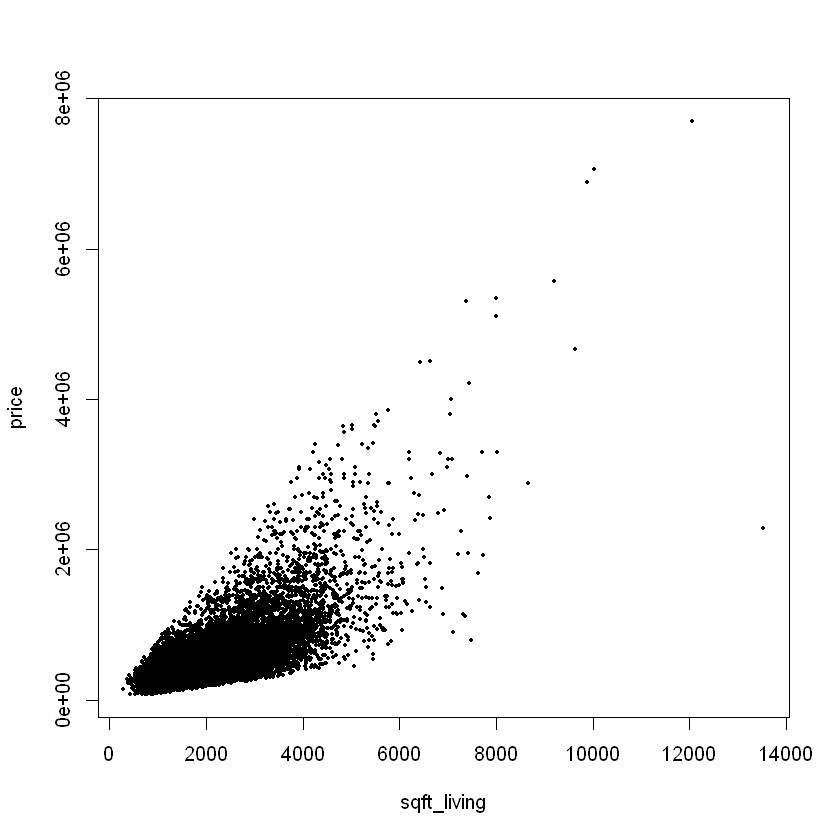

In [17]:
with(house_data, plot(sqft_living, price,cex=0.6, pch=20:20))

#### Write a generic function that accepts a column of data (e.g, an SArray) ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept.

In [100]:
get_slope_intercept_for_feature <- function(data, input_feature, output_feature){
    rows = nrow(data)
    s_input_f = sum(data[, input_feature])
    s_output_f = sum(data[, output_feature])
    s_feature_product = sum(data[, input_feature] * data[, output_feature])
    s_input_f_squared = sum(data[, input_feature] * data[, input_feature])
    
    numerator = s_feature_product - (1 / rows) * (s_input_f * s_output_f)
    denominator = s_input_f_squared - (1 / rows) * (as.numeric(s_input_f) * as.numeric(s_input_f))
    
    slope = numerator / denominator
    intercept = (s_output_f / rows) - slope * (s_input_f / rows)
    
    return(c(slope, intercept))
}

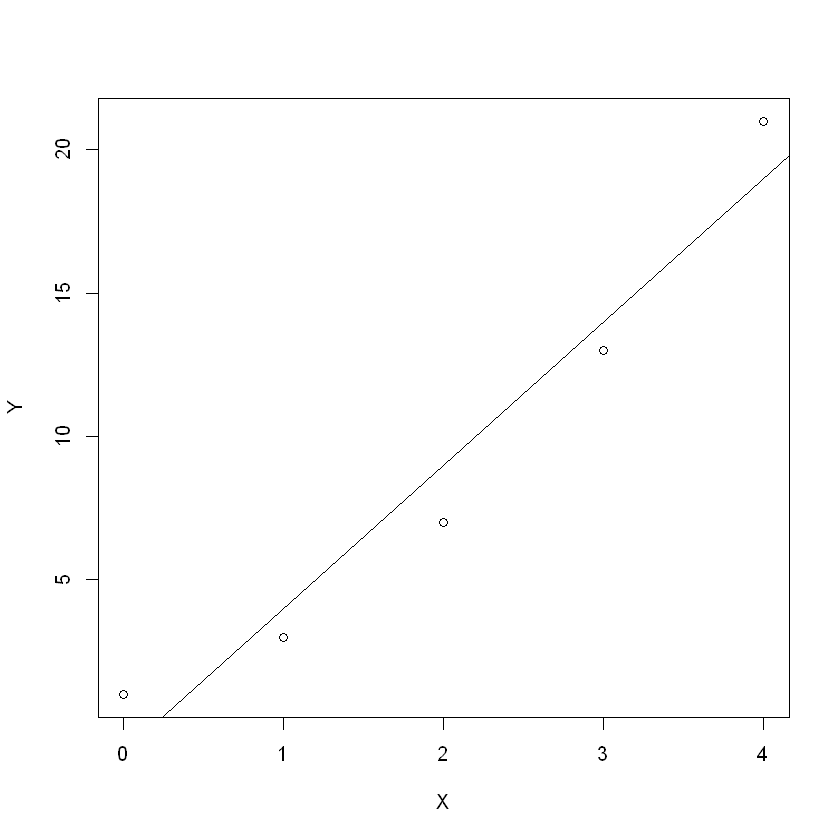

In [101]:
# First try with test data whch should produce slope = 5 and intercept = -1
x <- c(0,1,2,3,4)
y <- c(1,3,7,13,21)
test_data <- data.frame('X' = x, 'Y' = y)


sl_int <- get_slope_intercept_for_feature(test_data, "X", "Y")
with(test_data, plot(X, Y))
abline(coef=rev(sl_int))

[1]    280.6236 -43580.7431


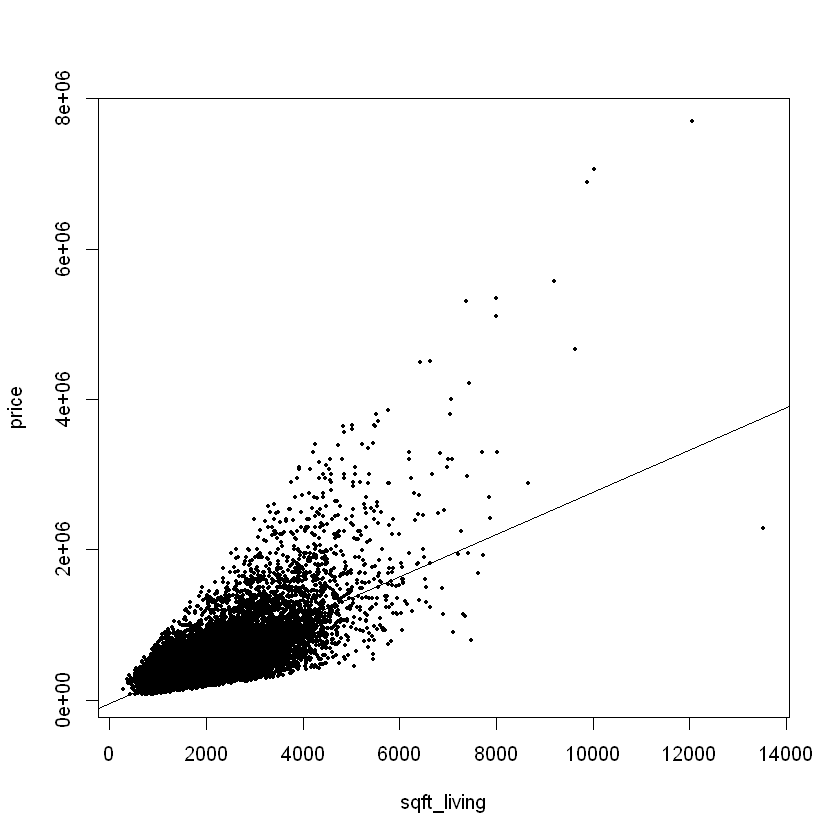

In [103]:
sl_int <- get_slope_intercept_for_feature(house_data, "sqft_living", "price")
print(sl_int)
with(house_data, plot(sqft_living, price,cex=0.6, pch=20:20))
abline(coef=rev(sl_int))

##### Now check against built in regression function

In [107]:
linearMod <- lm(price ~ sqft_living, data=house_data) 
summary(linearMod)


Call:
lm(formula = price ~ sqft_living, data = house_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476062  -147486   -24043   106182  4362067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43580.743   4402.690  -9.899   <2e-16 ***
sqft_living    280.624      1.936 144.920   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 261500 on 21611 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21611 DF,  p-value: < 2.2e-16
